In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data1=pd.read_csv("C:\\Users\\advay\\Downloads\\Assignment 5\\ToyotaCorolla.csv")

In [3]:
data1.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
data1.drop(data1.iloc[:,18:39],inplace=True,axis=1)

In [5]:
data1.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1436 non-null   int64 
 1   Model          1436 non-null   object
 2   Price          1436 non-null   int64 
 3   Age_08_04      1436 non-null   int64 
 4   Mfg_Month      1436 non-null   int64 
 5   Mfg_Year       1436 non-null   int64 
 6   KM             1436 non-null   int64 
 7   Fuel_Type      1436 non-null   object
 8   HP             1436 non-null   int64 
 9   Met_Color      1436 non-null   int64 
 10  Color          1436 non-null   object
 11  Automatic      1436 non-null   int64 
 12  cc             1436 non-null   int64 
 13  Doors          1436 non-null   int64 
 14  Cylinders      1436 non-null   int64 
 15  Gears          1436 non-null   int64 
 16  Quarterly_Tax  1436 non-null   int64 
 17  Weight         1436 non-null   int64 
dtypes: int64(15), object(3)
memo

In [6]:
data2=data1.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Fuel_Type','Met_Color','Color','Automatic','Cylinders'],axis=1)

In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
data2.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [9]:
data2.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [10]:
data2.rename(columns={'Age_08_04':'age','Quarterly_Tax':'Q_tax'},inplace=True)

In [11]:
data2.head()

,Price,age,KM,HP,cc,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [12]:
sns.set_style(style='darkgrid')

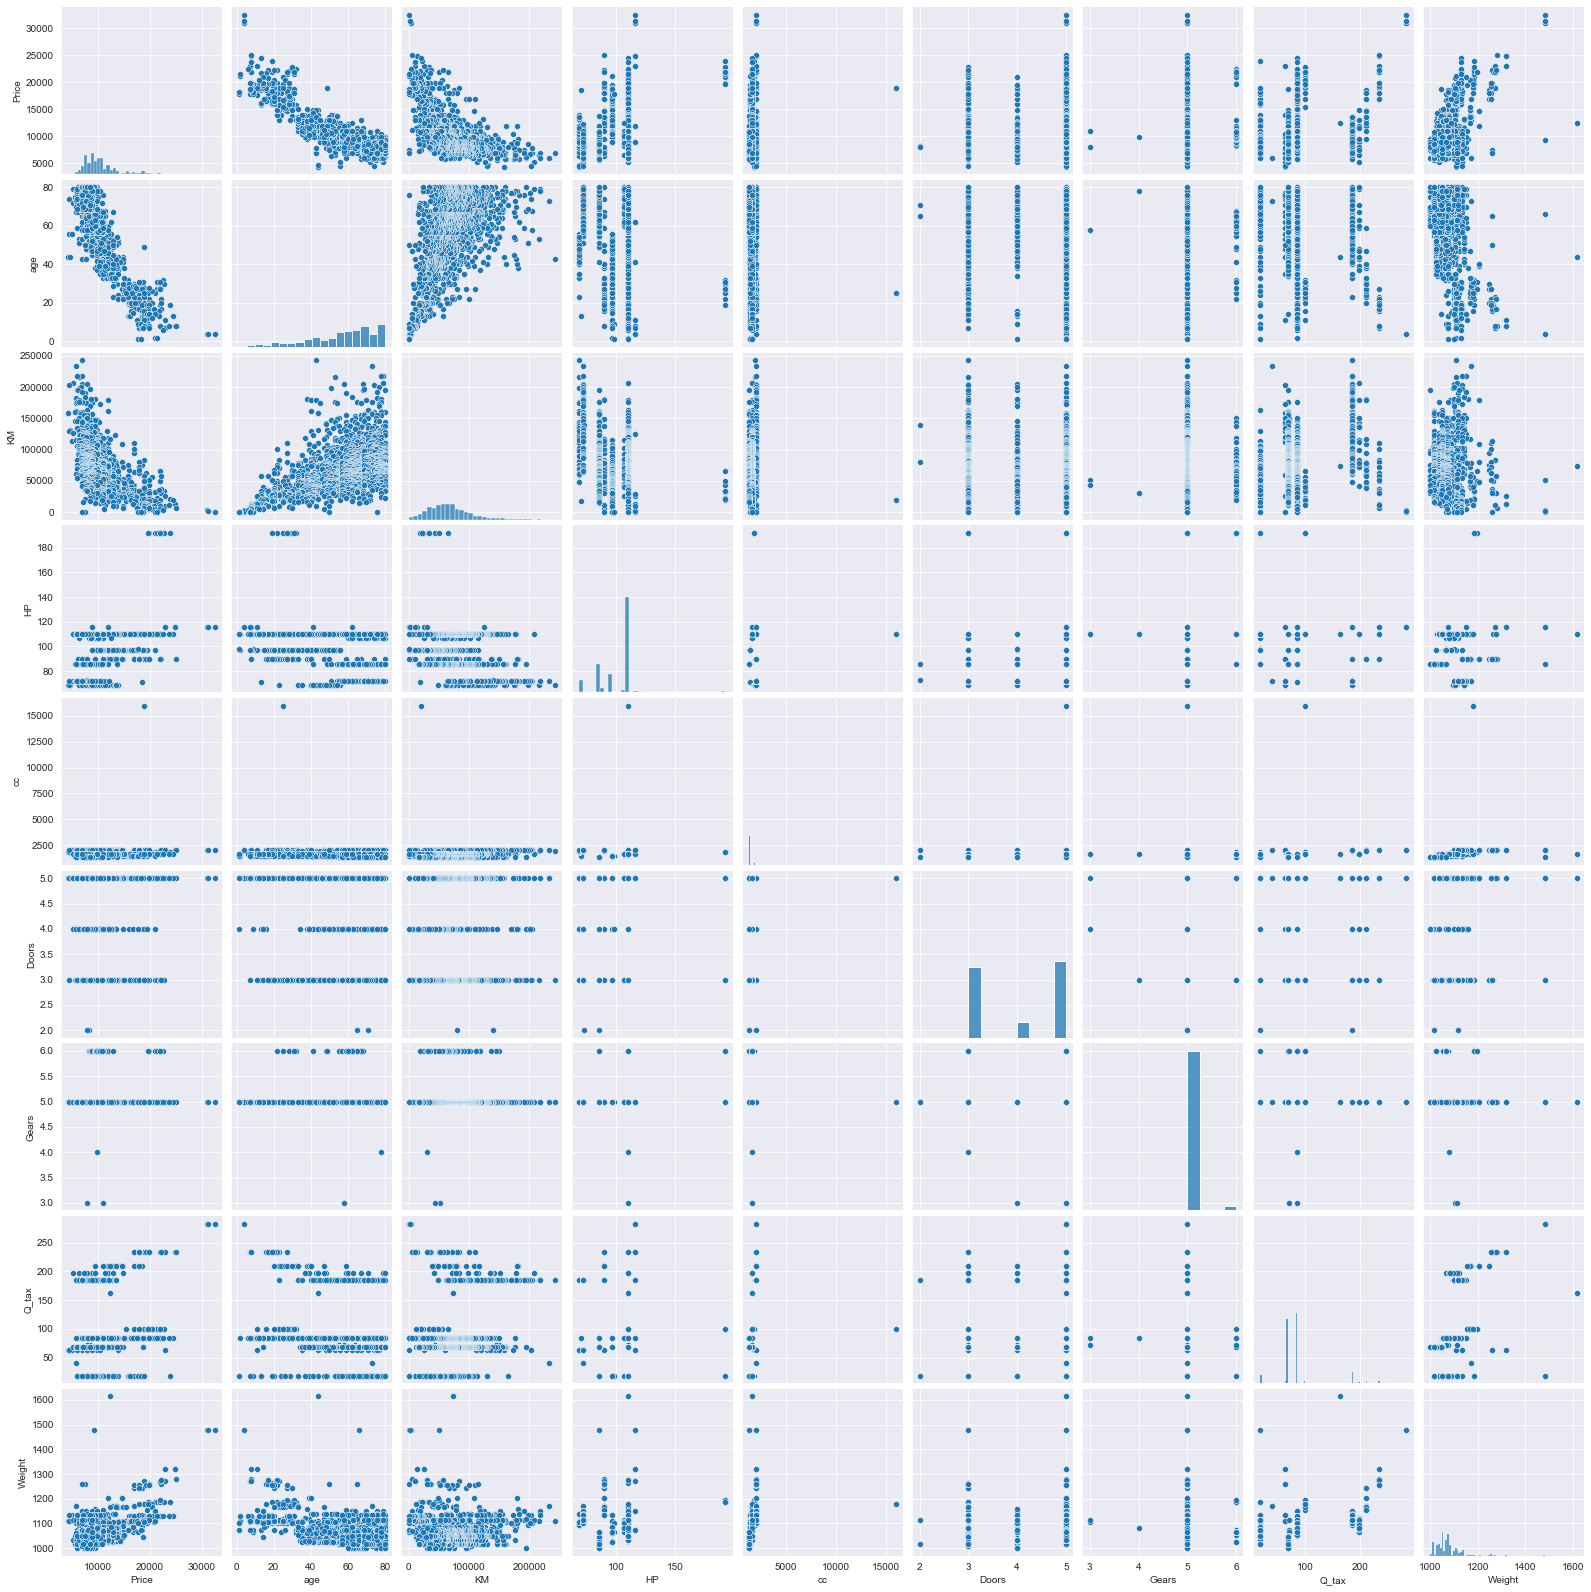

In [13]:
#to get an overview of the data
sns.pairplot(data2)

In [15]:
#building the model 
model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+Q_tax+Weight',data=data2).fit()

In [16]:
model.params

Intercept   -5573.106358
age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
Q_tax           3.949081
Weight         16.958632
dtype: float64

In [17]:
#t and p values 
print(model.tvalues,'/n',model.pvalues)

Intercept    -3.948666
age         -46.511852
KM          -16.621622
HP           11.241018
cc           -1.344222
Doors        -0.040410
Gears         3.016007
Q_tax         3.014535
Weight       15.879803
dtype: float64 /n Intercept     8.241949e-05
age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
cc            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
Q_tax         2.619148e-03
Weight        2.048576e-52
dtype: float64


In [51]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [18]:
    #as we can see that cc and Doors p-value is greater than 0.05 so it is insignificant 
md_cc=smf.ols('Price~cc',data=data2).fit()
#t and pvalues for the data 
print(md_cc.tvalues,'/n',md_cc.pvalues)

Intercept    24.694090
cc            4.824822
dtype: float64 /n Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [19]:
md_Doors=smf.ols('Price~Doors',data=data2).fit()
print(md_Doors.tvalues,'/n',md_Doors.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 /n Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [21]:
md_Doorscc=smf.ols('Price~Doors+cc',data=data2).fit()
print(md_Doorscc.tvalues,'/n',md_Doorscc.pvalues)

Intercept    12.620704
Doors         6.816153
cc            4.340400
dtype: float64 /n Intercept    1.056885e-34
Doors        1.373469e-11
cc           1.521992e-05
dtype: float64


In [31]:
#calculating VIF
rsq_age=smf.ols('age~KM+HP+cc+Doors+Gears+Q_tax+Weight',data=data2).fit().rsquared
vif_age=1/(1-rsq_age)                
rsq_KM=smf.ols('KM~age+HP+cc+Doors+Gears+Q_tax+Weight',data=data2).fit().rsquared
vif_KM=1/(1-rsq_KM)
rsq_HP=smf.ols('HP~age+KM+cc+Doors+Gears+Q_tax+Weight',data=data2).fit().rsquared
vif_HP=1/(1-rsq_HP)
rsq_cc=smf.ols('cc~age+KM+HP+Doors+Gears+Q_tax+Weight',data=data2).fit().rsquared
vif_cc=1/(1-rsq_cc)
rsq_Doors=smf.ols('Doors~age+KM+HP+cc+Gears+Q_tax+Weight',data=data2).fit().rsquared
vif_Doors=1/(1-rsq_Doors)
rsq_Gears=smf.ols('Gears~age+KM+HP+cc+Doors+Q_tax+Weight',data=data2).fit().rsquared
vif_Gears=1/(1-rsq_Gears)
rsq_Q_tax=smf.ols('Q_tax~age+KM+HP+cc+Doors+Gears+Weight',data=data2).fit().rsquared
vif_Q_tax=1/(1-rsq_Q_tax)
rsq_Weight=smf.ols('Weight~age+KM+HP+cc+Doors+Gears+Q_tax',data=data2).fit().rsquared
vif_Weight=1/(1-rsq_Weight)
#storing the values 
d1={'Variables':['age','KM','HP','cc','Doors','Gears','Q_tax','Weight'],'VIF':[vif_age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Q_tax,vif_Weight]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Q_tax,2.311431
7,Weight,2.516420


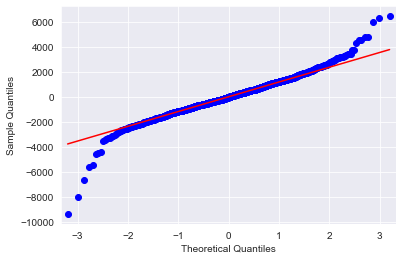

In [32]:
#to check if the data is tending to normal distribution 
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title=("Q-Q Plot Of Residuals")
plt.show()

In [33]:
#Residual plot for homoscedasitcity-to ensure that the variance between each data point is same 
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()


TypeError: 'str' object is not callable

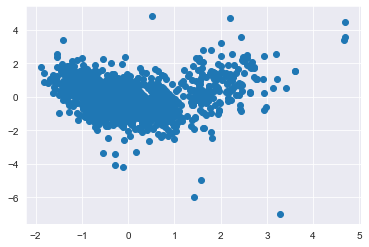

In [34]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlable('Standardized Fitted Values')
plt.ytable('Standardized Residual Values'
plt.show()

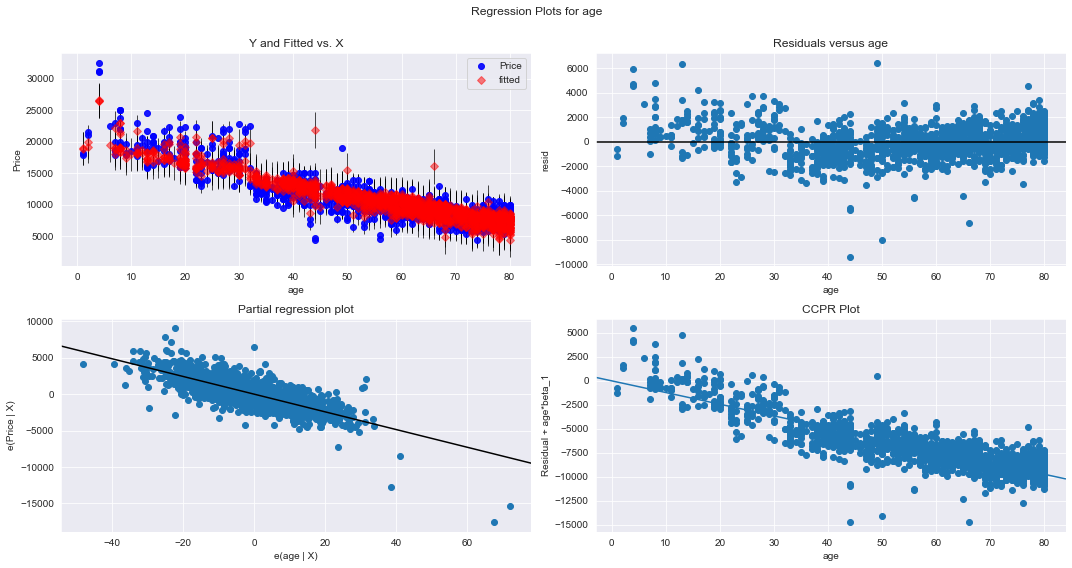

In [36]:
#Residual Vs Regressors
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"age",fig=fig)
plt.show()

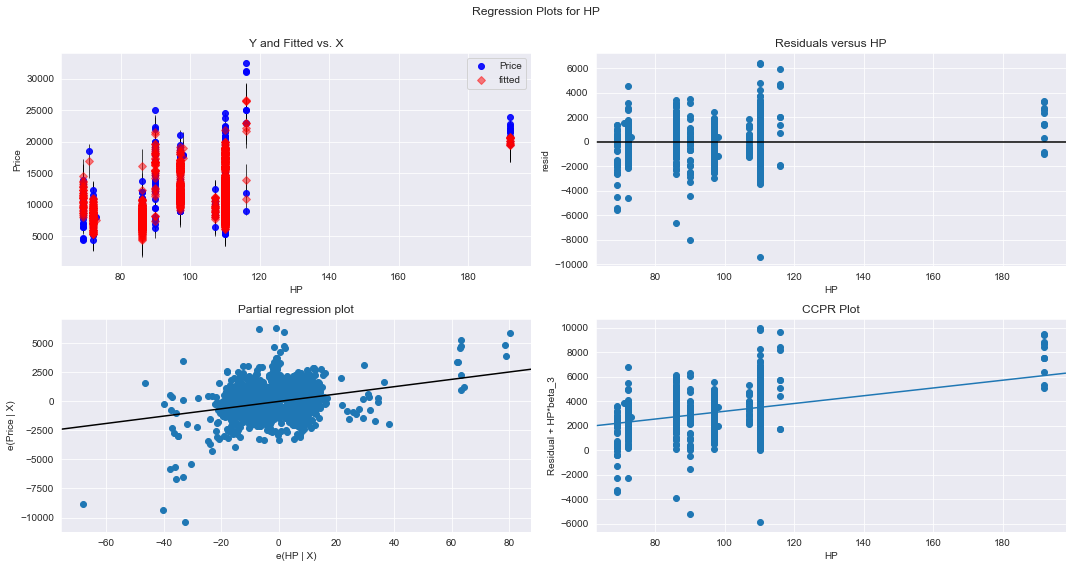

In [38]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

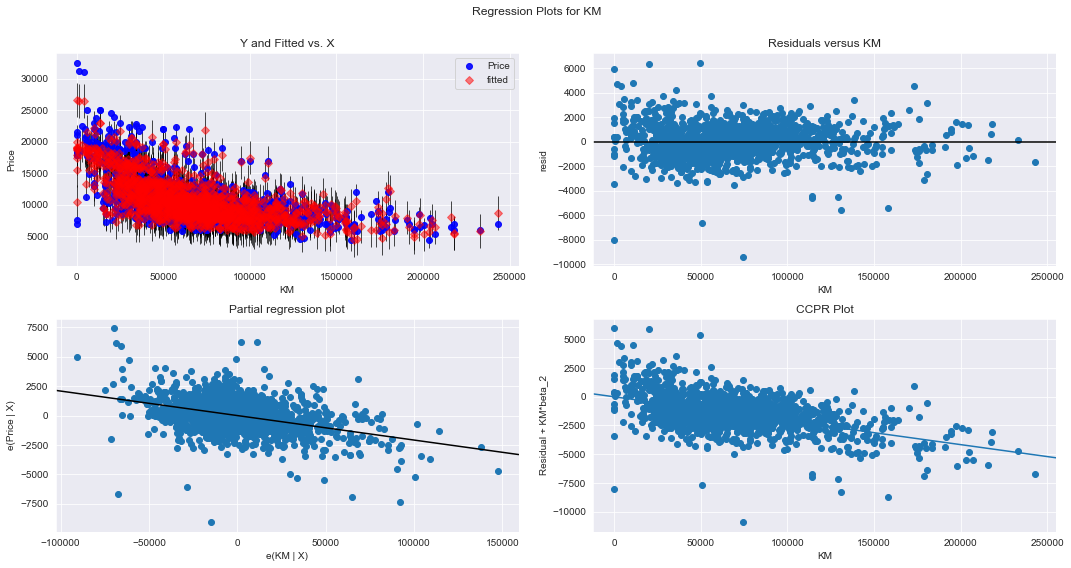

In [39]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

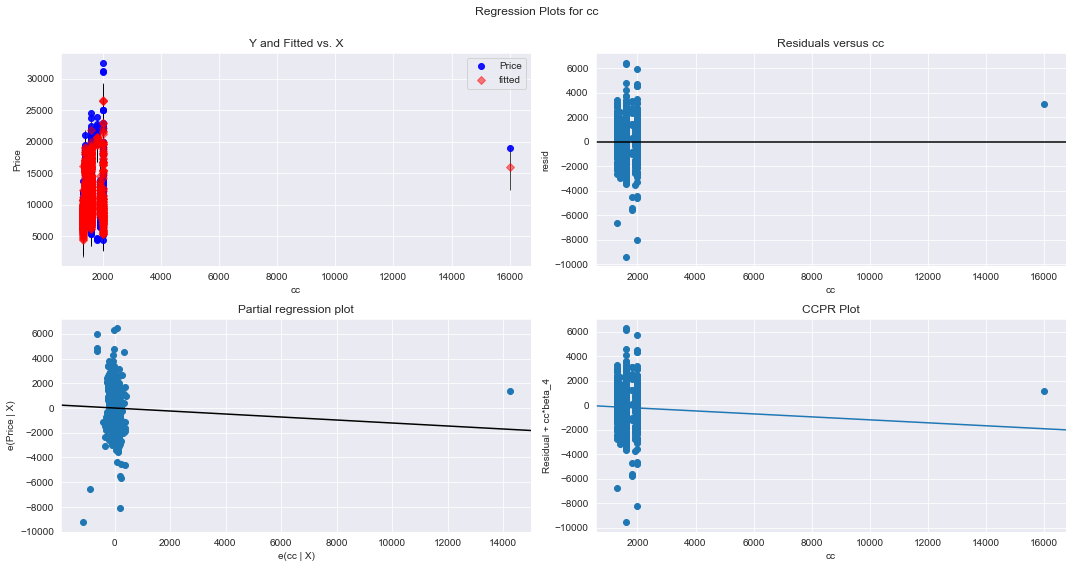

In [40]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

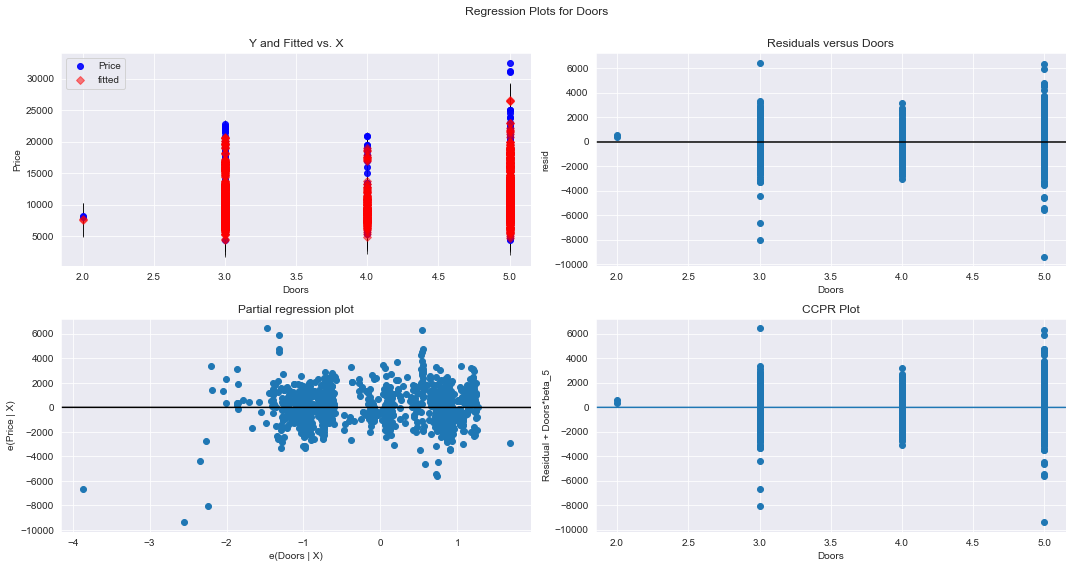

In [41]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

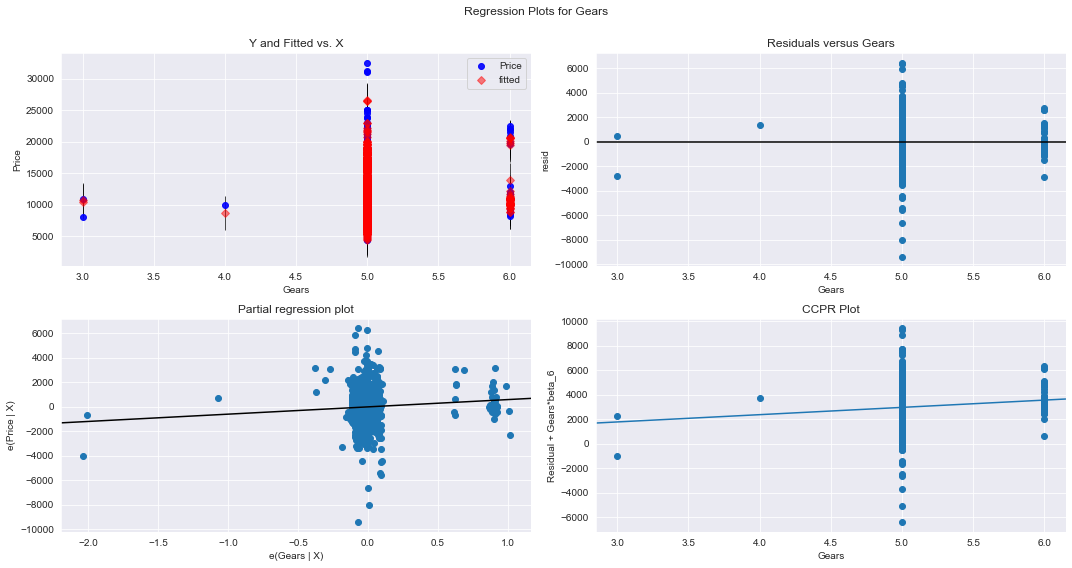

In [42]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

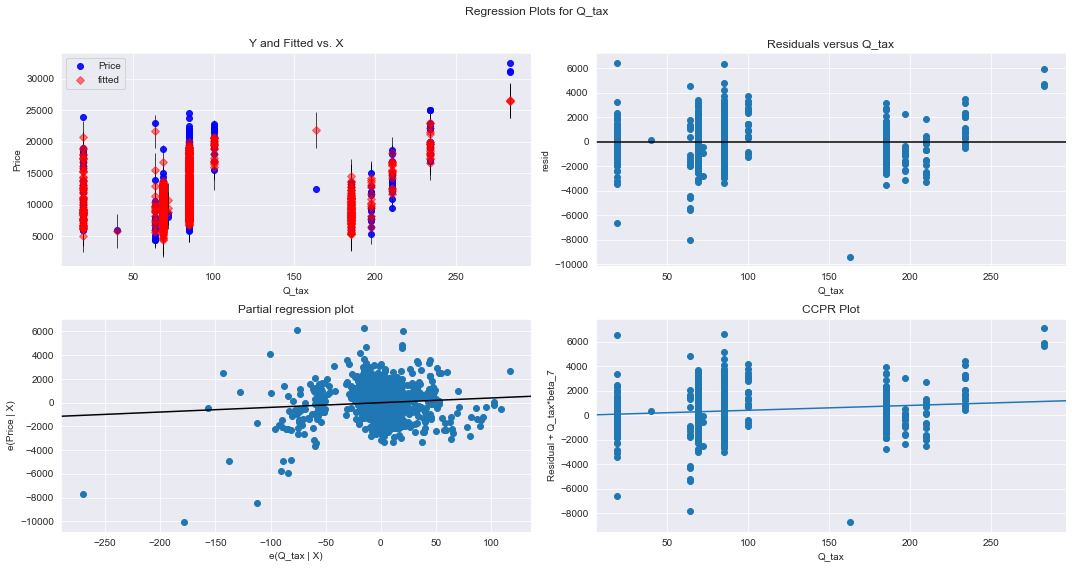

In [43]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Q_tax",fig=fig)
plt.show()

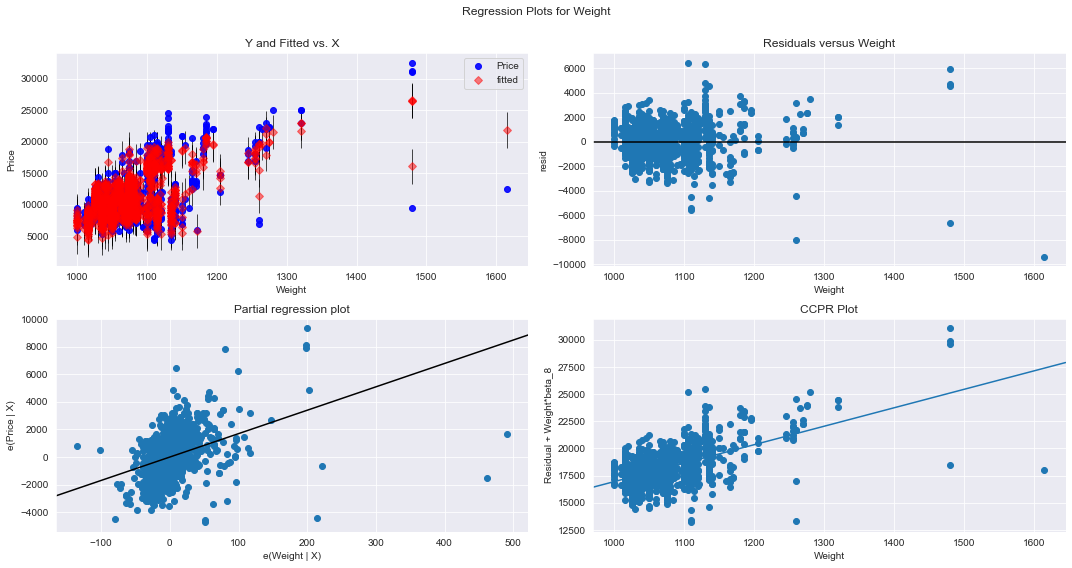

In [44]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

In [45]:
#building final model
model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+Q_tax+Weight',data=data2).fit()

In [52]:
#predicting values for new data 
new_data=pd.DataFrame({'age':[0,38,75,90,82],'HP':[250,50,178,200,250],'KM':[0,1000,100000,250000,300000],'cc':[18000,16500,17000,17500,18000],'Doors':[2,4,6,5,2],'Gears':[7,4,6,7,8],'Q_tax':[20,50,100,290,360],'Weight':[1450,1500,1650,1900,2000]})


In [53]:
new_data

,age,HP,KM,cc,Doors,Gears,Q_tax,Weight
0,0,250,0,18000,2,7,20,1450
1,38,50,1000,16500,4,4,50,1500
2,75,178,100000,17000,6,6,100,1650
3,90,200,250000,17500,5,7,290,1900
4,82,250,300000,18000,2,8,360,2000


In [54]:
model.predict(new_data)

0    28993.318743
1    17375.162556
2    18734.167104
3    20009.071360
4    24036.445953
dtype: float64